# Housing Prices Dataset

The housing prices dataset used for this example is a reduced version of the original [Boston Housing Datset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html), which was originally collected by the U.S. Census Service. We choose to focus on three features of the originally dataset (RM, LSTST, and PTRATIO) and the output, or target (MEDV) that we are learning to predict.

|Feature| Description|
|---|---|
|RM |       Average number of rooms per dwelling|
|LSTAT |    A measurement of the socioeconomic status of people living in the area|
|PTRATIO |  Pupil-teacher ratio by town - approximation of the local education system's quality|
|MEDV |     Median value of owner-occupied homes in $1000's|

Sample:

|RM   |LSTAT|PTRATIO|MEDV|
|-----|----|----|--------|
|6.575|4.98|15.3|504000.0|
|6.421|9.14|17.8|453600.0|
|7.185|4.03|17.8|728700.0|
|6.998|2.94|18.7|701400.0|


## Detailed Walkthrough

### Step 1: Create an input data repository

Once the Pachyderm cluster is running, create a data repository called `housing_data` where we will put our dataset.

```bash
$ pachctl create repo housing_data
$ pachctl list repo
NAME                CREATED             SIZE
csv_data        3 seconds ago       0 B
```

In [1]:
!pachctl create repo csv_data
!pachctl list repo

NAME     CREATED                SIZE (MASTER) ACCESS LEVEL 
csv_data Less than a second ago ≤ 0B          [repoOwner]   


### Step 2: Add the housing dataset to the repo

Now we can add the data, which will kick off the processing automatically. If we update the data with a new commit, then the pipeline will automatically re-run. 

```bash
$ pachctl put file csv_data@master:housing-simplified.csv -f data/housing-simplified-1.csv
```

We can inspect that the data is in the repository by looking at the files in the repository.

```bash
$ pachctl list file csv_data@master
NAME                    TYPE SIZE
/housing-simplified.csv file 12.14KiB
```

In [2]:
!pachctl put file csv_data@master:housing-simplified.csv -f data/housing-simplified-1.csv
!pachctl list file csv_data@master

data/housing-simplified-1.csv 2.54 KB / 2.54 KB [==================] 0s 0.00 b/s
data/housing-simplified-1.csv 2.54 KB / 2.54 KB [==================] 0s 0.00 b/s
data/housing-simplified-1.csv 2.54 KB / 2.54 KB [==================] 0s 0.00 b/s
data/housing-simplified-1.csv 2.54 KB / 2.54 KB [==================] 0s 0.00 b/s
data/housing-simplified-1.csv 2.54 KB / 2.54 KB [==================] 0s 0.00 b/s
data/housing-simplified-1.csv 2.54 KB / 2.54 KB [==================] 0s 0.00 b/s
data/housing-simplified-1.csv 2.54 KB / 2.54 KB [==================] 0s 0.00 b/s
data/housing-simplified-1.csv 2.54 KB / 2.54 KB [==================] 0s 0.00 b/s
data/housing-simplified-1.csv 2.54 KB / 2.54 KB [==================] 0s 0.00 b/s
NAME                    TYPE SIZE     
/housing-simplified.csv file 2.482KiB 


### Start the Experiments

We're going to use the Python-Pachyderm SDK to access our data and start experimenting.

In [2]:
import python_pachyderm
import pandas as pd

client = python_pachyderm.Client()

f = client.get_file(("csv_data", "master"), "/housing-simplified.csv")
data = pd.read_csv(f)

data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,100.000000,100.000000,100.00000,100.000000
mean,6.234410,10.772900,18.69000,468489.000000
std,0.490838,5.700031,1.69893,124487.368143
min,5.399000,1.980000,15.10000,266700.000000
25%,5.926250,6.702500,17.90000,396900.000000
50%,6.130500,9.465000,18.70000,451500.000000
75%,6.433000,13.315000,19.70000,518700.000000
max,8.069000,30.810000,21.10000,919800.000000


### Data Analysis

When you run the code below, it creates a pair plot and a correlation matrix showing the relationship between features. By seeing what features are positively or negatively correlated to the target value (or each other), it can helps us understand what features may be valuable to the model.


<Figure size 432x288 with 0 Axes>

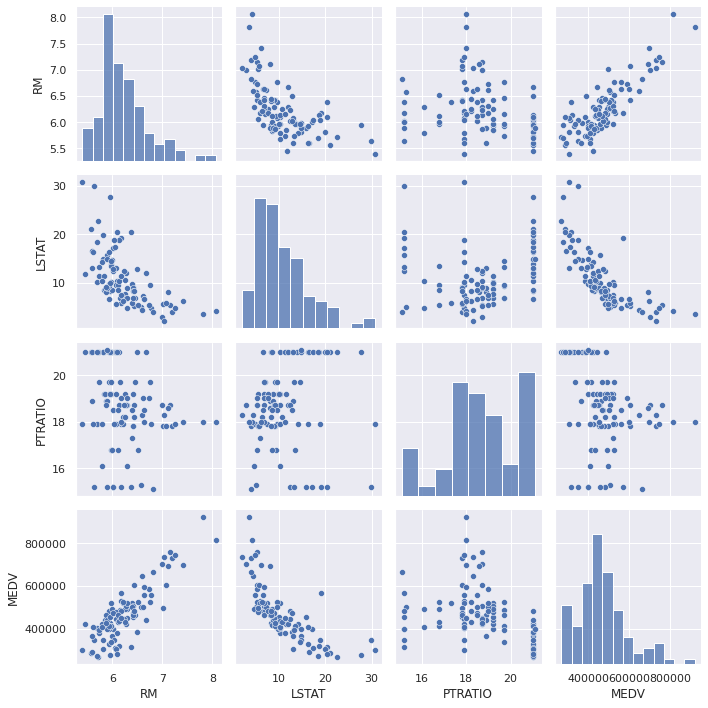

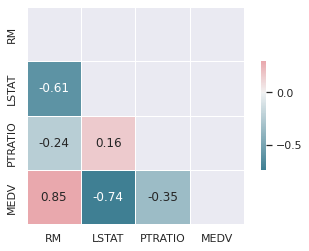

In [5]:
from nb_utils import data_analysis, set_dtypes

data_analysis(data)

### Regresssion

Setup regression


Training set has 90 data points with 4 variables each.
Testing set has 10 data points with 4 variables each.
Cross Val Score: 0.792043 (+/- 0.333699)


<Figure size 432x288 with 0 Axes>

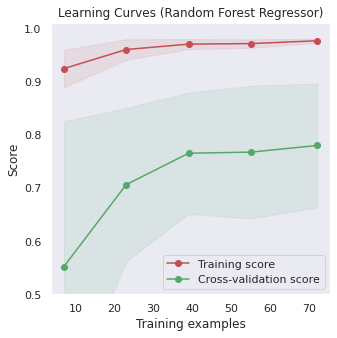

Test Score: 0.070938


In [4]:
from sklearn.model_selection import train_test_split
from nb_utils import load_data,train_model,test_model,create_learning_curve,plt

input_data = data

target_col = "MEDV"
training_data, test_data = train_test_split(input_data, test_size=0.1,random_state=42)
train_data, train_features, train_targets = load_data(training_data, target_col)
print("Training set has {} data points with {} variables each.".format(*train_data.shape))
test_data, test_features, test_targets = load_data(test_data, target_col)
print("Testing set has {} data points with {} variables each.".format(*test_data.shape))

reg = train_model(train_features, train_targets)
test_results = test_model(reg, test_features, test_targets)
create_learning_curve(reg, train_features, train_targets)
plt.show()

print(test_results)

When we inspect the learning curve, we can see that there is a large gap between the training score and the validation score. This typically indicates that our model could benefit from the addition of more data. 

Now let's update our dataset with additional examples.

### Step 6: Update Dataset
Similar to the original housing prices example, we'll now add some new data. 




In [8]:
!pachctl put file csv_data@master:housing-simplified.csv -f data/housing-simplified-2.csv
!pachctl list commit csv_data@master

In [ ]:
f = client.get_file(("csv_data", "master"), "/housing-simplified.csv")
data2 = pd.read_csv(f)

Now Lets Rerun the Model with the new data.

In [ ]:
from sklearn.model_selection import train_test_split
from utils import load_data,train_model,test_model,create_learning_curve,plt

input_data = data2

target_col = "MEDV"
training_data, test_data = train_test_split(input_data, test_size=0.1,random_state=42)
train_data, train_features, train_targets = load_data(training_data, target_col)
print("Training set has {} data points with {} variables each.".format(*train_data.shape))
test_data, test_features, test_targets = load_data(test_data, target_col)
print("Testing set has {} data points with {} variables each.".format(*test_data.shape))

reg = train_model(train_features, train_targets)
test_results = test_model(reg, test_features, test_targets)
create_learning_curve(reg, train_features, train_targets)
plt.show()

print(test_results)

Wow, now things look pretty good. lets try and add more data.

### Step 7: Update Dataset Again
Similar to the original housing prices example, we'll now add some new data. 

```bash
$ pachctl put file csv_data@master:housing-simplified.csv -f data/housing-simplified-error.csv
```

In [10]:
!pachctl put file csv_data@master:housing-simplified.csv -f data/housing-simplified-error.csv
!pachctl list commit csv_data@master

data/housing-simplified-error.csv 3.46 KB / 3.46 KB [==============] 0s 0.00 b/s
data/housing-simplified-error.csv 3.46 KB / 3.46 KB [==============] 0s 0.00 b/s
data/housing-simplified-error.csv 3.46 KB / 3.46 KB [==============] 0s 0.00 b/s
data/housing-simplified-error.csv 3.46 KB / 3.46 KB [==============] 0s 0.00 b/s
data/housing-simplified-error.csv 3.46 KB / 3.46 KB [==============] 0s 0.00 b/s
data/housing-simplified-error.csv 3.46 KB / 3.46 KB [==============] 0s 0.00 b/s
data/housing-simplified-error.csv 3.46 KB / 3.46 KB [==============] 0s 0.00 b/s
data/housing-simplified-error.csv 3.46 KB / 3.46 KB [==============] 0s 0.00 b/s
data/housing-simplified-error.csv 3.46 KB / 3.46 KB [==============] 0s 0.00 b/s
REPO     BRANCH COMMIT                           FINISHED               SIZE     ORIGIN DESCRIPTION
csv_data master 7284d030cf2d493ab2f9f40bb9be3ad2 Less than a second ago 3.374KiB USER    
csv_data master 2b1c7330014946ac8670f51aed7bbf72 5 minutes ago          12.14KiB 

Now lets retrain the model with the new data.

Training set has 90 data points with 5 variables each.
Testing set has 10 data points with 5 variables each.
Cross Val Score: 0.988327 (+/- 0.037879)


<Figure size 432x288 with 0 Axes>

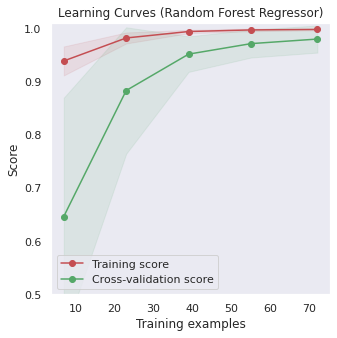

Test Score: 0.997388


In [11]:
f = client.get_file(("csv_data", "master"), "/housing-simplified.csv")
data3 = pd.read_csv(f)

from sklearn.model_selection import train_test_split
from nb_utils import load_data,train_model,test_model,create_learning_curve,plt

input_data = data3

target_col = "MEDV"
training_data, test_data = train_test_split(input_data, test_size=0.1,random_state=42)
train_data, train_features, train_targets = load_data(training_data, target_col)
print("Training set has {} data points with {} variables each.".format(*train_data.shape))
test_data, test_features, test_targets = load_data(test_data, target_col)
print("Testing set has {} data points with {} variables each.".format(*test_data.shape))

reg = train_model(train_features, train_targets)
test_results = test_model(reg, test_features, test_targets)
create_learning_curve(reg, train_features, train_targets)
plt.show()

print(test_results)

Uh Oh, that doesn't look right. Lets look at the data:

In [ ]:
data_analysis(data3)

Yup, it looks like a bad test feature got in there. Let's switch back to the previous version by setting `master^`.

Training set has 440 data points with 4 variables each.
Testing set has 49 data points with 4 variables each.
Cross Val Score: 0.815111 (+/- 0.104549)


<Figure size 432x288 with 0 Axes>

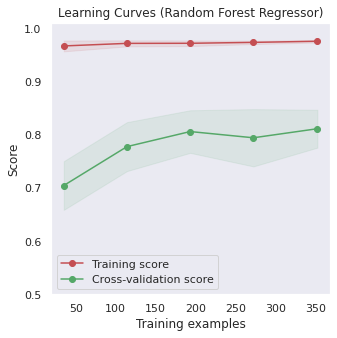

Test Score: 0.831015


In [12]:
f = client.get_file(("csv_data", "master^"), "/housing-simplified.csv")
data4 = pd.read_csv(f)

from sklearn.model_selection import train_test_split
from nb_utils import load_data,train_model,test_model,create_learning_curve,plt

input_data = data4

target_col = "MEDV"
training_data, test_data = train_test_split(input_data, test_size=0.1,random_state=42)
train_data, train_features, train_targets = load_data(training_data, target_col)
print("Training set has {} data points with {} variables each.".format(*train_data.shape))
test_data, test_features, test_targets = load_data(test_data, target_col)
print("Testing set has {} data points with {} variables each.".format(*test_data.shape))

reg = train_model(train_features, train_targets)
test_results = test_model(reg, test_features, test_targets)
create_learning_curve(reg, train_features, train_targets)
plt.show()

print(test_results)